# Aufgabe 5

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

In [28]:
all_names = []
all_data = []
for i in range(4):
    with open('data/xx0%d.csv' % i) as fp:
        # get name of data from file, remove newline
        all_names.append(fp.readline().split(',')[1][:-1])
        all_data.append(np.loadtxt(fp, delimiter=','))
# fix for data with one row only
all_data[2] = all_data[2].reshape((1,2))
all_names

['NLRG', 'BLRG', 'Quasar', 'LERG']

[Text(0,0.5,'$\\mathrm{Q}_{HS}/\\mathrm{erg}\\,\\mathrm{s}^{-1}$'),
 Text(0.5,0,'$\\mathrm{L}_{151}/\\mathrm{W}\\,\\mathrm{Hz}^{-1}\\,\\mathrm{Sr}^{-1}$'),
 Text(0.5,1,'Jet- und Radioleistungen von FR-I Galaxien')]

C:\tools\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


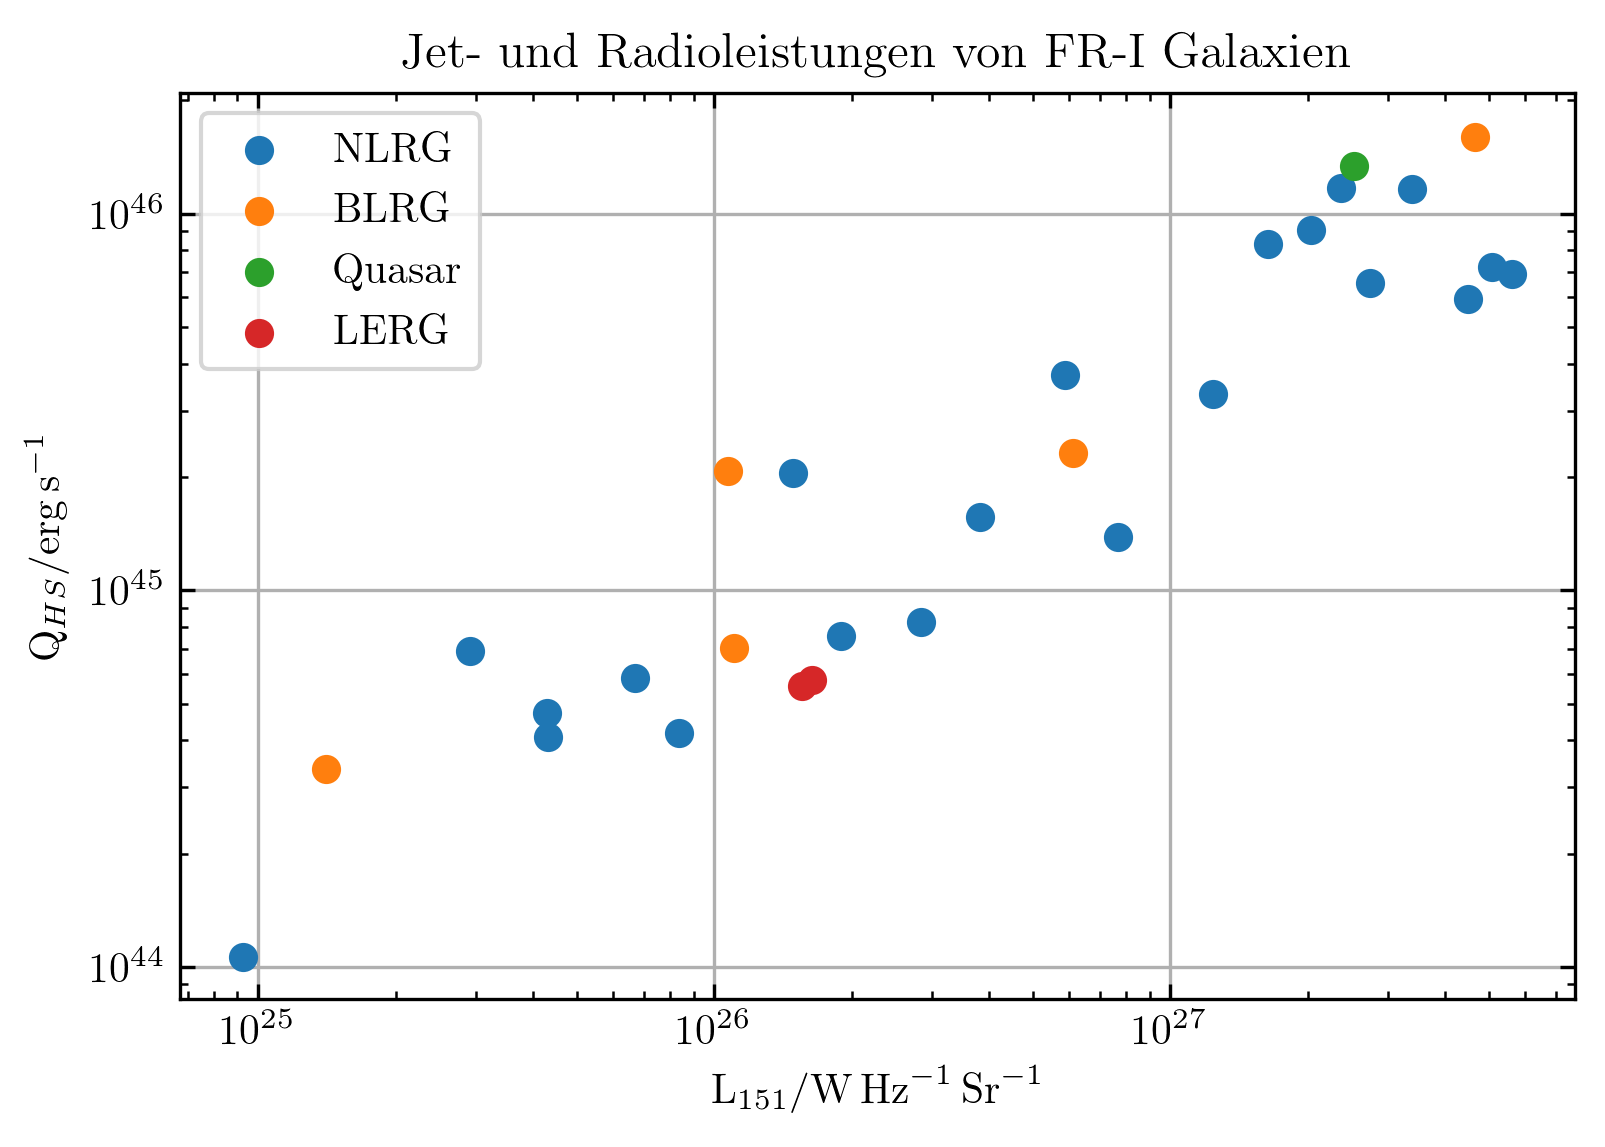

In [32]:
for data, name in zip(all_data, all_names):
    plt.scatter(data[:,0], data[:,1], label=name)
    plt.gca().set(xscale='log', yscale='log')
plt.legend()
plt.gca().set(title='Jet- und Radioleistungen von FR-I Galaxien',
              xlabel='$\mathrm{L}_{151}/\mathrm{W}\,\mathrm{Hz}^{-1}\,\mathrm{Sr}^{-1}$',
              ylabel='$\mathrm{Q}_{HS}/\mathrm{erg}\,\mathrm{s}^{-1}$')